<a href="https://colab.research.google.com/github/Sumanth1242/MKsumanth_data690/blob/main/assignment_08/10_LLN_CTL_Dice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 10 - The Foundation of Inferential Statistics 
## The Law of Large Numbers(LLN) and The Central Limit Theorem (CLT)
## Using Dice Rolling for Simulation

The American Statistical Association (ASA) defines statistics as "the science of learning from data, as well as measuring, controlling, and communicating uncertainty." One of the two major branches of statistics is inferential statistics (the other is Descriptive Statistics). It describes and infers about an unknown population by using a random sample of data drawn from that population. Inferential statistics, also known as statistical inference, is based on two theorems.:

- **The Rule of Large Numbers**(The mean of a large sample of trials is close to the mean of the distribution)
- **Critical Limit Theorems** (Even if the underlying population distribution is not normal, the sampling distribution of a sample mean is approximately normal.)



In [5]:
# Import useful Python libraries upfront

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
#from pylab import rcParams

## Let's Explore LLN first

According to LLN, as sample size increases, the mean approaches the population average. 

We'll play a dice roll simulation.
A dice has six possible outcomes: 1, 2, 3, 4, 5, and 6. These results are from a discrete distribution. 

The probability distribution of a discrete random variable X is a list of all possible values of X along with the probability that that value will be used in one trial of the experiment. 

- Each probability P(x) must be between 0 and 1: 0≤P(x)≤1. 
- The sum of all the probabilities is 1: ΣP(x)=1.

This is known as the probability mass function (pmf). It should be noted that the distribution for a continuous random variable is the probability density function (pdf)

We begin with a sample size of 5 and increase it by 10 increments until it reaches 1000. We compute the sample means and plot a line against the sample sizes. As the sample size increases, the sample mean converges to the population mean, which is 3.5, as shown by the horizontal line.

In [6]:
# Frst, we generate sample means

DICE = [1,2,3,4,5,6]
PROB = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]

sample_means = []
sample_sizes = range(5, 500, 10)

#for size in sample_sizes:
#    sample = np.random.choice(a=DICE,  p=PROB, size=size)
#    sample_means.append(sample.mean())              # append the sameple mean to the list

# Instead of using for loop, we use the parsimonious list comprehension 
sample_means = [round(np.random.choice(a=DICE, p=PROB, size=s).mean(),2) for s in sample_sizes] 

print(sample_means[:10])                   # display the first 10 sample means
print(sample_means[-10:])                  # display the last 10 sample means

[4.2, 3.33, 3.16, 3.57, 3.8, 3.58, 3.48, 3.24, 3.21, 3.24]
[3.57, 3.61, 3.52, 3.47, 3.5, 3.55, 3.64, 3.49, 3.46, 3.42]


In [7]:
# population mean

pop_mean = np.mean(DICE)  

print(pop_mean)

3.5


In [8]:
#DICE = [1,2,3,4,5,6]
#PROB = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
#pop_mean = sum(DICE) / len(DICE)
#print("pop mean = ", pop_mean)
#x = np.random.choice(a=DICE, p=PROB, size=200)
#print("sample mean = ", x.mean())

Text(0.5, 0, 'Sample Size')

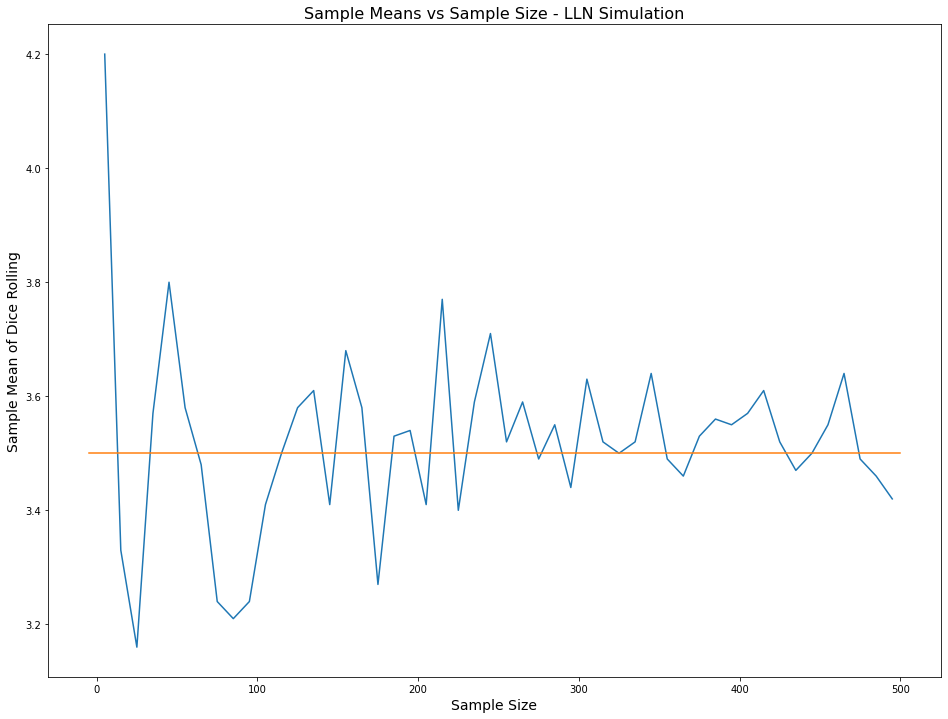

In [9]:
# Next, we make a line plot to show the relationship between sample mean and sample size


fig, ax = plt.subplots(figsize=(16,12))

# make a line plot of sample means (y-axis) along sample sizes (x-axis)
ax.plot(sample_sizes, sample_means) 

# draw a horizontal line of the population mean                                             
ax.plot((-5,sample_sizes[-1] + 5), (pop_mean, pop_mean)) 

ax.set_title("Sample Means vs Sample Size - LLN Simulation", size=16)
ax.set_ylabel("Sample Mean of Dice Rolling", size=14)
ax.set_xlabel("Sample Size", size=14)

# Homework Question #1

Implement the above chart using Plotly Express. Hint:
- Use the line chart. 
- Add a horizonal line. 

In [10]:
import plotly.express as px

df = pd.DataFrame(list(zip(sample_sizes, sample_means)),
               columns =['sample_sizes', 'sample_means'])


fig = px.line(df,
              x="sample_sizes",
              y="sample_means",
              labels= {'sample_sizes' : 'Sample Size',
              'sample_means' : 'Sample Mean of Dice Rolling'},
              title = "Sample Means vs Sample Size - LLN Simulation",
              width=1200,
              height=700,
              template= 'plotly_white')

fig.add_hline(y=pop_mean)

fig.show()

## Let's explore the Central Limit Theorm (CLT)

CLT states that if the sample size is large enough, the sampling distribution of the sample mean of any independent, random variable will be normal or nearly normal. How big is "big enough"? The answer is determined by two factors.s:

- **Requirements for accuracy**- The more sample points required, the closer the sampling distribution must resemble a normal distribution.
- **The shape of the underlying population** - The fewer sample points required, the more closely the original population resembles a normal distribution. 

In practice, some statisticians believe that a sample size of 30 is sufficient when the population distribution is roughly bell-shaped. Others recommend a sample size of at least 40. However, if the original population is clearly abnormal (e.g., skewed, has multiple peaks, and/or contains outliers), researchers prefer a larger sample size.

As can be seen from the plot, as sample size increases, the sampling distribution approaches normality, its mean converges to the population mean, and its variance decreases. This means that as the sample size grows, we can be more confident that the sample mean approximates the population mean.

Text(0, 0.5, 'Density')

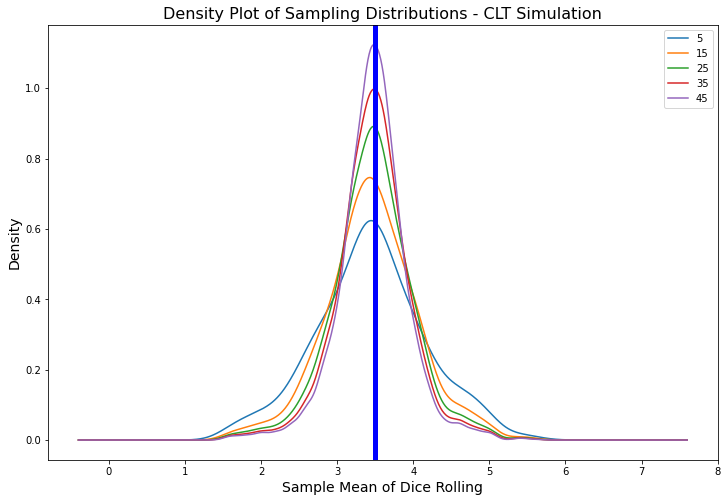

In [11]:
fig, ax = plt.subplots(figsize=(12,8))

for s in range(5, 50, 10):     # sample sizes
    for i in range(500):        # repeat the experiment enough times to get a distribution
      sample = np.random.choice(a=DICE,  p=PROB, size=s)
      sample_means.append(sample.mean())              # append the sameple mean to the list

# The matplotlib histrogram does not look good. Use Pandas density plot instead.
#   ax.hist(sample_means, density=True, legend=True) 
    pd.DataFrame(sample_means).plot.density(ax=ax)

ax.legend(sample_sizes) 

# draw a vertical line of the population mean 
ax.axvline(x=pop_mean, linewidth=5, color="b")  

ax.set_title("Density Plot of Sampling Distributions - CLT Simulation", size=16)
ax.set_xlabel("Sample Mean of Dice Rolling",size=14)
ax.set_ylabel("Density",size=14)

# Homework Question 2 (optional)

Implement the above plot using Plotly.

In [12]:
sample_means = []
for i in range(500):        # repeat the experiment enough times to get a distribution
    sample = np.random.choice(a=DICE,  p=PROB, size=50)
    sample_means.append(sample.mean())  

sample_means[:10]

[3.64, 3.22, 3.66, 3.56, 3.42, 3.66, 3.9, 3.8, 3.42, 3.4]

(array([  4.,   8.,  24.,  64.,  96., 132.,  91.,  53.,  21.,   7.]),
 array([2.74 , 2.884, 3.028, 3.172, 3.316, 3.46 , 3.604, 3.748, 3.892,
        4.036, 4.18 ]),
 <a list of 10 Patch objects>)

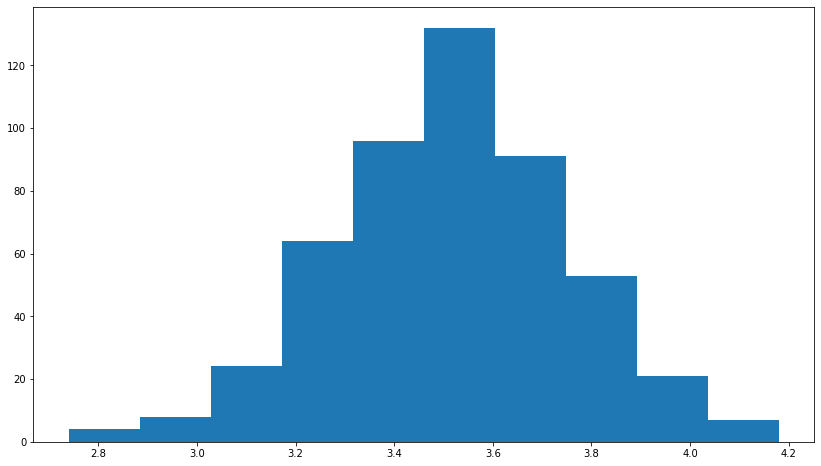

In [13]:
fig,ax = plt.subplots(figsize=(14,8))
ax.hist(sample_means)

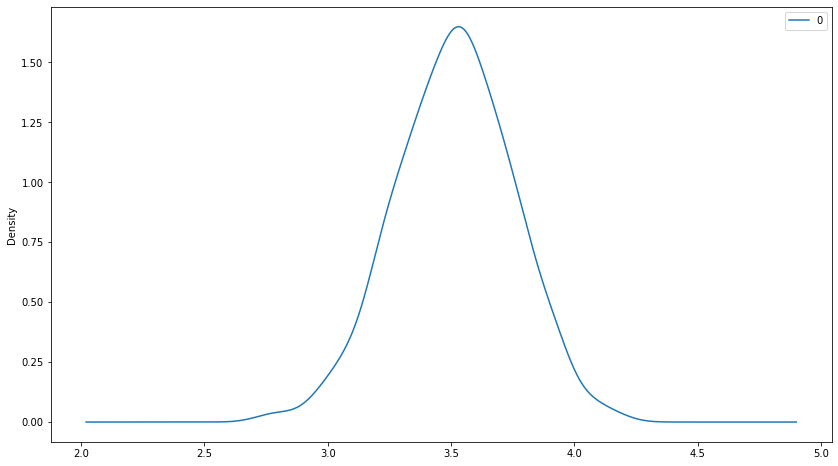

In [14]:
fig,ax = plt.subplots(figsize=(14,8))
df = pd.DataFrame(sample_means)
df.plot.density(ax=ax)